<a href="https://colab.research.google.com/github/AISA-DucHaba/AI-Solution-Architect/blob/main/AISA_agentic_ai_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌻 Agentic AI to Create Synthetic Data


---

- This is part of Lesson #14 in the AI Solution Architect course cohort #5 USA-edition by ELVTR and Duc Haba.

- Let's Rock and Roll

- **ROLE** defintion by icon:

  - 🤠 is AI Solution Architect role.
  - 🤓 is Data Engineer role.
  - 🤔 is AI QA role.
  - 🤪 is the Domain Expert role.

## 🤠 Objective

**PRIMARY ROLE:** AI Solution Architect

- This Agent AI demonstration aims to use Agentic AI to create sythetic data to predict **Nurse Burnout**.

- **NOTE:** This is only for testing. Please do **not** use this data in actual project.

- The class link: ["AI Solution Architect,"](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin) from ELVTR and Duc Haba.

## 🙈 Legal:

---

- This Python Jupyter Notebook is for sharing with **Friends** in the AISA course by ELVTR and Duc Haba.

- If you are **NOT** my friend, and I see you. In the best spirit of the **science community**, you may read this Notebook, but be aware that I see you.

- Copyrights 2023 and 2025 Duc Haba: [GNU GENERAL PUBLIC LICENSE 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html#license-text)

In [ ]:
!pip install psutil

In [15]:
# prompt: print current date, time and system stat.
import datetime
import psutil

current_datetime = datetime.datetime.now()
print("Current Date and Time:", current_datetime)

# Get system stats
cpu_percent = psutil.cpu_percent(interval=1)
memory_info = psutil.virtual_memory()

print("CPU Usage:", cpu_percent, "%")
print("Memory Usage:", memory_info.percent, "%")
print("Total Memory:", memory_info.total / (1024**3), "GB")
print("Available Memory:", memory_info.available / (1024**3), "GB")

Current Date and Time: 2025-08-11 20:57:08.231487
CPU Usage: 68.5 %
Memory Usage: 8.2 %
Total Memory: 12.673774719238281 GB
Available Memory: 11.638179779052734 GB


In [1]:
# Prompt (GPT 5.0): Write a python function using an agent framework with 1. input, 2. decide, 3. act, 4. reflection, and 5. output for creating synthetic data for the goal of identify nurse burnout in a week in advanced.
#
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import Dict, Any, Tuple
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 0) Agent config + types
# -----------------------------
@dataclass
class AgentConfig:
    n_samples: int = 3000
    random_state: int = 42
    target_prevalence: float = 0.18  # ~18% weekly burnout risk flag
    horizon_days: int = 7            # predict 7 days ahead

@dataclass
class AgentOutput:
    data: pd.DataFrame
    model: Any
    metrics: Dict[str, float]
    notes: str

# -----------------------------
# 1) INPUT
# -----------------------------
def agent_input(user_goal: str, cfg: AgentConfig) -> Dict[str, Any]:
    """
    Capture goal + constraints. In a real agent, this could parse a natural language goal.
    """
    return {
        "goal": user_goal,
        "constraints": {
            "horizon_days": cfg.horizon_days,
            "target_prevalence": cfg.target_prevalence,
            "n_samples": cfg.n_samples
        }
    }

# -----------------------------
# 2) DECIDE
# -----------------------------
def agent_decide(context: Dict[str, Any]) -> Dict[str, Any]:
    """
    Decide on a synthetic data strategy + simple baseline model.
    """
    strategy = {
        "features": [
            # workload / scheduling
            "shift_hours", "overtime_hours_7d", "consecutive_shifts",
            "weekends_worked_4w", "patient_ratio",
            # wellbeing / physiology (synthetic proxies)
            "sleep_hours", "hrv_ms", "break_minutes",
            # environment / org factors
            "admin_burden_score", "incident_count_7d",
            "pager_alerts_7d", "support_score",
            # subjective / NLP proxy
            "sentiment_score"
        ],
        "generator": "Gaussian + programmatic correlations",
        "label": "burnout_in_7d",
        "model_type": "logistic_regression"
    }
    context["decision"] = strategy
    return context

# -----------------------------
# 3) ACT  (generate data + train)
# -----------------------------
def _simulate_synthetic_dataframe(cfg: AgentConfig, features: list) -> pd.DataFrame:
    rng = np.random.default_rng(cfg.random_state)

    n = cfg.n_samples
    # Base distributions
    shift_hours           = rng.normal(10.5, 1.6, n).clip(6, 16)
    overtime_hours_7d     = np.clip(rng.gamma(2.2, 1.5, n), 0, 30)
    consecutive_shifts    = rng.integers(1, 7, n)
    weekends_worked_4w    = rng.integers(0, 4, n)
    patient_ratio         = rng.normal(5.2, 1.2, n).clip(1, 10)  # patients per nurse
    sleep_hours           = rng.normal(6.2, 1.0, n).clip(3, 9)
    hrv_ms                = rng.normal(55, 15, n).clip(20, 120)  # heart rate variability (ms)
    break_minutes         = rng.normal(28, 10, n).clip(0, 60)
    admin_burden_score    = rng.normal(6.0, 2.0, n).clip(0, 10)  # higher = worse
    incident_count_7d     = rng.poisson(0.6, n).clip(0, 6)
    pager_alerts_7d       = rng.poisson(10, n).clip(0, 50)
    support_score         = rng.normal(6.5, 1.8, n).clip(0, 10)   # higher = better support
    sentiment_score       = rng.normal(0.05, 0.35, n).clip(-1, 1) # proxy from notes

    # Programmatic correlations that plausibly relate to burnout risk
    workload_signal = (
        0.22*shift_hours +
        0.16*overtime_hours_7d +
        0.18*consecutive_shifts +
        0.14*patient_ratio +
        0.10*pager_alerts_7d +
        0.08*incident_count_7d +
        0.15*admin_burden_score
    )

    recovery_buffer = (
        0.20*sleep_hours +
        0.12*hrv_ms/10.0 +
        0.12*break_minutes/10.0 +
        0.18*support_score +
        0.12*(sentiment_score*10)
    )

    # Latent risk score
    latent = workload_signal - recovery_buffer + rng.normal(0, 0.8, n)

    # Convert latent risk to probability with a calibrated sigmoid
    z = (latent - latent.mean()) / (latent.std() + 1e-6)
    base_prob = 1 / (1 + np.exp(-z))

    # Calibrate to target prevalence
    target = cfg.target_prevalence
    # Simple shift to match mean probability to target prevalence
    shift = np.log(target/(1-target)) - np.log(base_prob.mean()/(1-base_prob.mean()))
    prob = 1 / (1 + np.exp(-(z + shift)))

    burnout_in_7d = (rng.uniform(0, 1, n) < prob).astype(int)

    df = pd.DataFrame({
        "shift_hours": shift_hours,
        "overtime_hours_7d": overtime_hours_7d,
        "consecutive_shifts": consecutive_shifts,
        "weekends_worked_4w": weekends_worked_4w,
        "patient_ratio": patient_ratio,
        "sleep_hours": sleep_hours,
        "hrv_ms": hrv_ms,
        "break_minutes": break_minutes,
        "admin_burden_score": admin_burden_score,
        "incident_count_7d": incident_count_7d,
        "pager_alerts_7d": pager_alerts_7d,
        "support_score": support_score,
        "sentiment_score": sentiment_score,
        "burnout_in_7d": burnout_in_7d,
        "burnout_prob_true": prob
    })
    return df[features + ["burnout_in_7d", "burnout_prob_true"]]

def _train_baseline(df: pd.DataFrame, label: str, features: list, seed: int) -> Tuple[Any, Dict[str, float]]:
    X = df[features].values
    y = df[label].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seed, stratify=y
    )

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s  = scaler.transform(X_test)

    model = LogisticRegression(max_iter=200, solver="lbfgs")
    model.fit(X_train_s, y_train)

    # Metrics
    pred_proba = model.predict_proba(X_test_s)[:, 1]
    auc = roc_auc_score(y_test, pred_proba)
    metrics = {"auc_roc": float(auc), "test_size": len(y_test), "positive_rate_test": float(y_test.mean())}
    return (scaler, model), metrics

def agent_act(context: Dict[str, Any], cfg: AgentConfig) -> Dict[str, Any]:
    feat = context["decision"]["features"]
    label = context["decision"]["label"]

    df = _simulate_synthetic_dataframe(cfg, feat)
    (scaler, model), metrics = _train_baseline(df, label, feat, cfg.random_state)

    context["artifacts"] = {"data": df, "scaler": scaler, "model": model, "metrics": metrics}
    return context

# -----------------------------
# 4) REFLECTION
# -----------------------------
def agent_reflect(context: Dict[str, Any]) -> Dict[str, Any]:
    m = context["artifacts"]["metrics"]
    notes = []

    # Simple guardrails & ideas for improvement
    if m["auc_roc"] < 0.70:
        notes.append("AUC < 0.70: consider adding richer features (unit acuity, shift type), non-linear models, or rebalancing.")
    else:
        notes.append("Strong baseline AUC. Next: try calibrated probabilities (Platt/Isotonic) and temporal validation.")

    # Ethical reflection for synthetic-data workflows
    notes.append(
        "Ethics: This is synthetic, but when using real data, ensure de-identification, "
        "fairness checks (e.g., disparate impact across units/shifts), and informed consent."
    )
    context["reflection"] = " ".join(notes)
    return context

# -----------------------------
# 5) OUTPUT
# -----------------------------
def agent_output(context: Dict[str, Any]) -> AgentOutput:
    df = context["artifacts"]["data"]
    model = context["artifacts"]["model"]
    metrics = context["artifacts"]["metrics"]
    notes = context["reflection"]
    return AgentOutput(data=df, model=model, metrics=metrics, notes=notes)

# -----------------------------
# Orchestrator
# -----------------------------
def nurse_burnout_synth_agent(
    goal: str = "Create synthetic data and a baseline model to predict nurse burnout 7 days in advance.",
    cfg: AgentConfig = AgentConfig()
) -> AgentOutput:
    ctx = agent_input(goal, cfg)       # 1) INPUT
    ctx = agent_decide(ctx)            # 2) DECIDE
    ctx = agent_act(ctx, cfg)          # 3) ACT
    ctx = agent_reflect(ctx)           # 4) REFLECTION
    out = agent_output(ctx)            # 5) OUTPUT
    return out

# -----------------------------
# Example usage
# -----------------------------
if __name__ == "__main__":
    result = nurse_burnout_synth_agent()
    print("AUC(ROC):", result.metrics["auc_roc"])
    print("Test positives:", result.metrics["positive_rate_test"])
    print("Notes:", result.notes)
    print("Synthetic head:\n", result.data.head())

AUC(ROC): 0.6839612555593568
Test positives: 0.21066666666666667
Notes: AUC < 0.70: consider adding richer features (unit acuity, shift type), non-linear models, or rebalancing. Ethics: This is synthetic, but when using real data, ensure de-identification, fairness checks (e.g., disparate impact across units/shifts), and informed consent.
Synthetic head:
    shift_hours  overtime_hours_7d  consecutive_shifts  weekends_worked_4w  \
0    10.987547           6.218996                   1                   0   
1     8.836025           9.071241                   6                   0   
2    11.700722           2.290622                   6                   1   
3    12.004904           0.390239                   2                   1   
4     7.378344           2.281605                   1                   2   

   patient_ratio  sleep_hours     hrv_ms  break_minutes  admin_burden_score  \
0       6.248002     7.154258  80.435305      25.654169            3.550153   
1       5.436376     

In [8]:
# check it rename it
result.data.head()

,shift_hours,overtime_hours_7d,consecutive_shifts,weekends_worked_4w,patient_ratio,sleep_hours,hrv_ms,break_minutes,admin_burden_score,incident_count_7d,pager_alerts_7d,support_score,sentiment_score,burnout_in_7d,burnout_prob_true
0,10.987547,6.218996,1,0,6.248002,7.154258,80.435305,25.654169,3.550153,1,7,8.474459,-0.024116,0,0.131800
1,8.836025,9.071241,6,0,5.436376,5.311535,31.999678,29.942931,1.760029,0,11,6.222685,0.201145,1,0.300056
2,11.700722,2.290622,6,1,7.072690,3.583250,85.345966,27.467215,6.077699,0,12,5.724464,0.187317,0,0.324015
3,12.004904,0.390239,2,1,6.101148,4.595457,59.333146,34.106911,5.801261,1,7,10.000000,-0.552362,0,0.070157
4,7.378344,2.281605,1,2,5.828758,5.171698,69.793574,50.119093,5.464385,0,12,9.053465,-0.352450,0,0.023587


In [10]:
result.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shift_hours         3000 non-null   float64
 1   overtime_hours_7d   3000 non-null   float64
 2   consecutive_shifts  3000 non-null   int64  
 3   weekends_worked_4w  3000 non-null   int64  
 4   patient_ratio       3000 non-null   float64
 5   sleep_hours         3000 non-null   float64
 6   hrv_ms              3000 non-null   float64
 7   break_minutes       3000 non-null   float64
 8   admin_burden_score  3000 non-null   float64
 9   incident_count_7d   3000 non-null   int64  
 10  pager_alerts_7d     3000 non-null   int64  
 11  support_score       3000 non-null   float64
 12  sentiment_score     3000 non-null   float64
 13  burnout_in_7d       3000 non-null   int64  
 14  burnout_prob_true   3000 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 351.7 KB


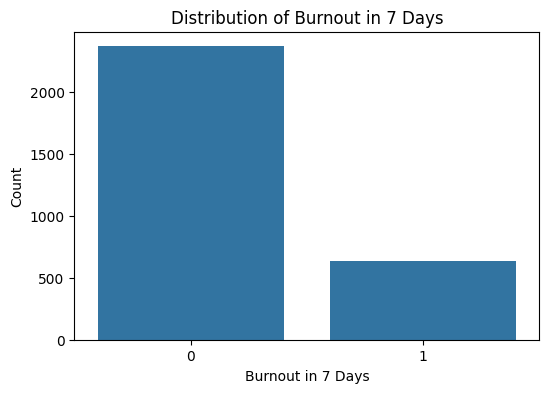

In [11]:
# prompt: (Gemini on this Notebook) Graph result.data
# one prompt gave many graph below
#
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='burnout_in_7d', data=result.data)
plt.title('Distribution of Burnout in 7 Days')
plt.xlabel('Burnout in 7 Days')
plt.ylabel('Count')
plt.show()

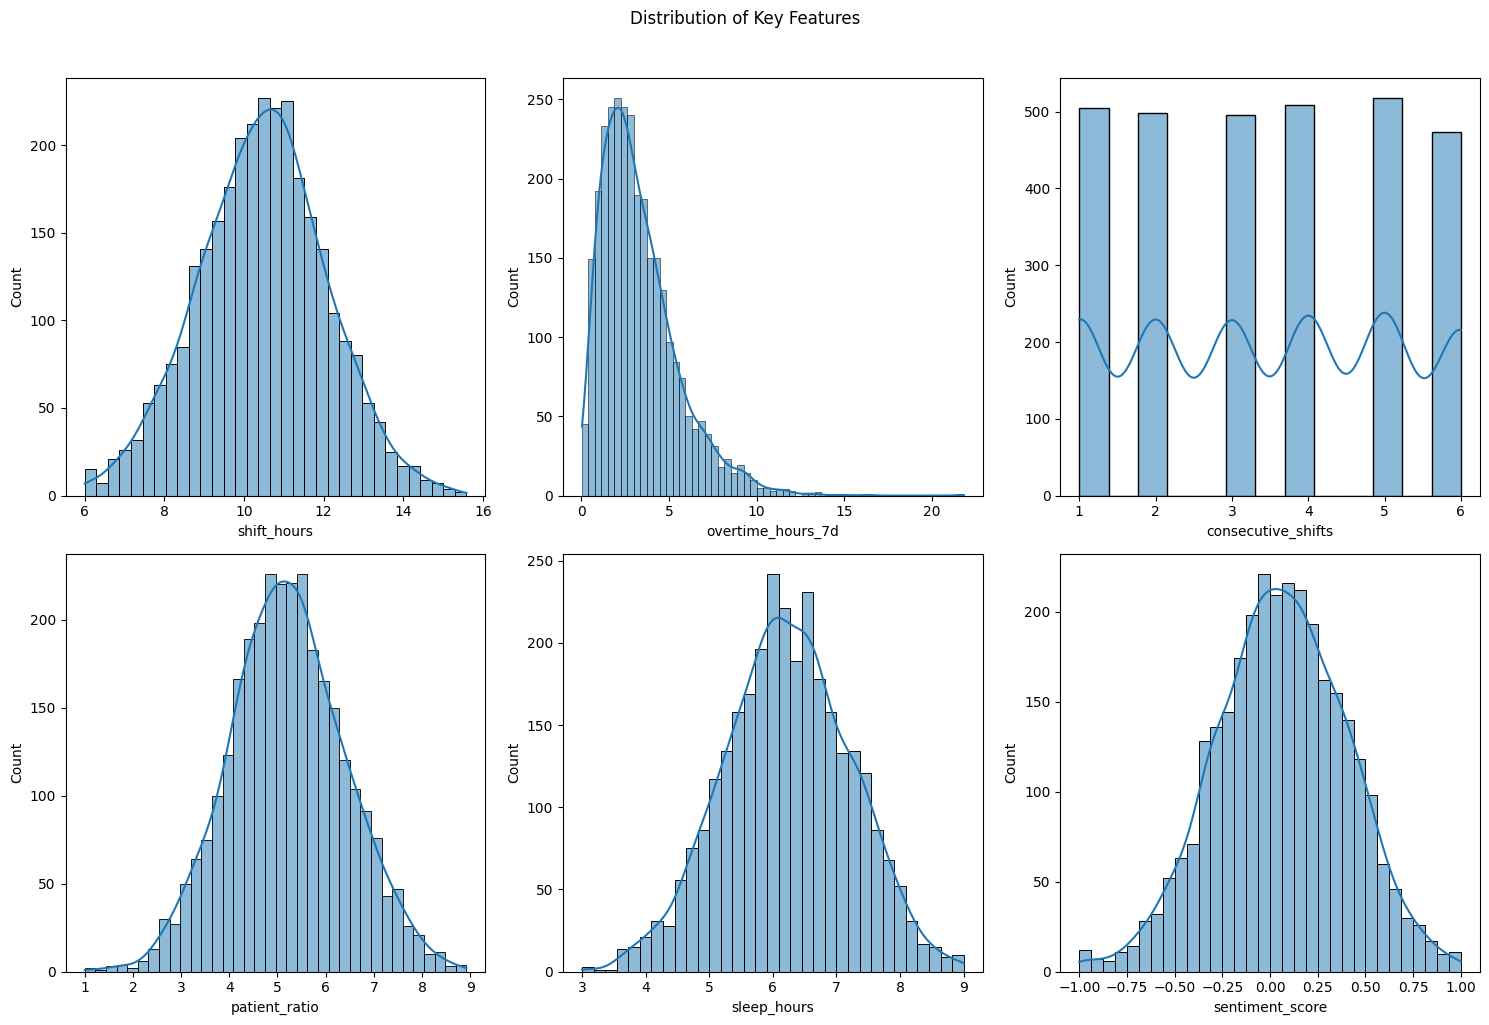

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Key Features', y=1.02)

sns.histplot(data=result.data, x='shift_hours', kde=True, ax=axes[0, 0])
sns.histplot(data=result.data, x='overtime_hours_7d', kde=True, ax=axes[0, 1])
sns.histplot(data=result.data, x='consecutive_shifts', kde=True, ax=axes[0, 2])
sns.histplot(data=result.data, x='patient_ratio', kde=True, ax=axes[1, 0])
sns.histplot(data=result.data, x='sleep_hours', kde=True, ax=axes[1, 1])
sns.histplot(data=result.data, x='sentiment_score', kde=True, ax=axes[1, 2])

plt.tight_layout()
plt.show()

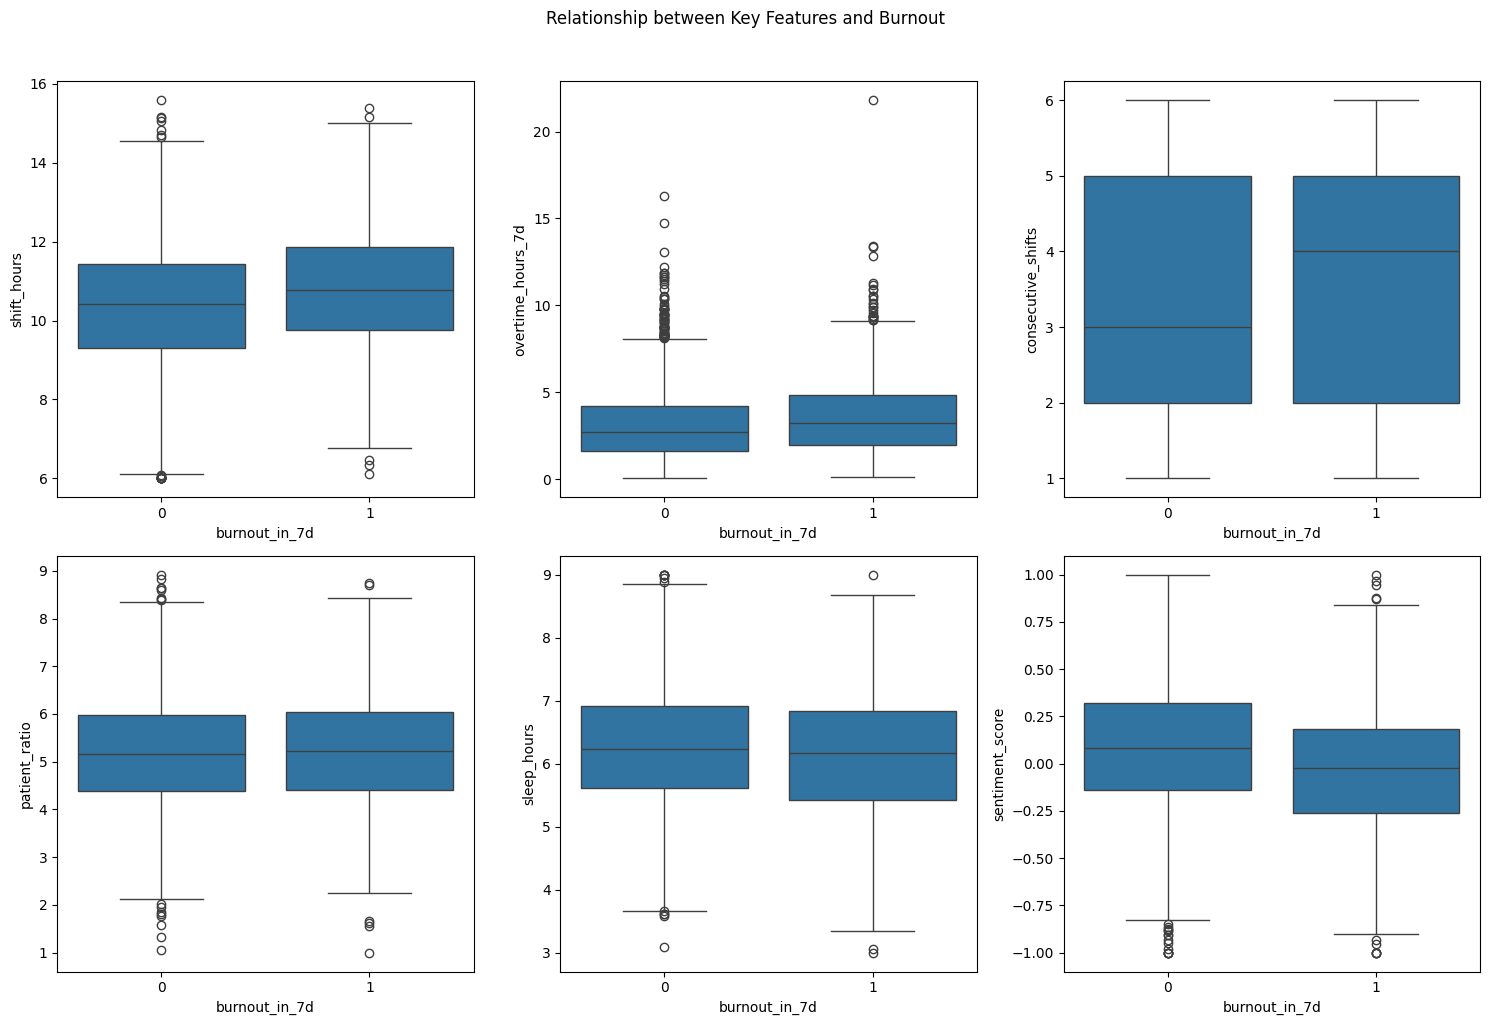

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Relationship between Key Features and Burnout', y=1.02)

sns.boxplot(x='burnout_in_7d', y='shift_hours', data=result.data, ax=axes[0, 0])
sns.boxplot(x='burnout_in_7d', y='overtime_hours_7d', data=result.data, ax=axes[0, 1])
sns.boxplot(x='burnout_in_7d', y='consecutive_shifts', data=result.data, ax=axes[0, 2])
sns.boxplot(x='burnout_in_7d', y='patient_ratio', data=result.data, ax=axes[1, 0])
sns.boxplot(x='burnout_in_7d', y='sleep_hours', data=result.data, ax=axes[1, 1])
sns.boxplot(x='burnout_in_7d', y='sentiment_score', data=result.data, ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [14]:
%pip install psutil